/wynton/home/paredes/aunoy/miniforge3/envs/cell_rank/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/wynton/home/paredes/aunoy/miniforge3/envs/cell_rank/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


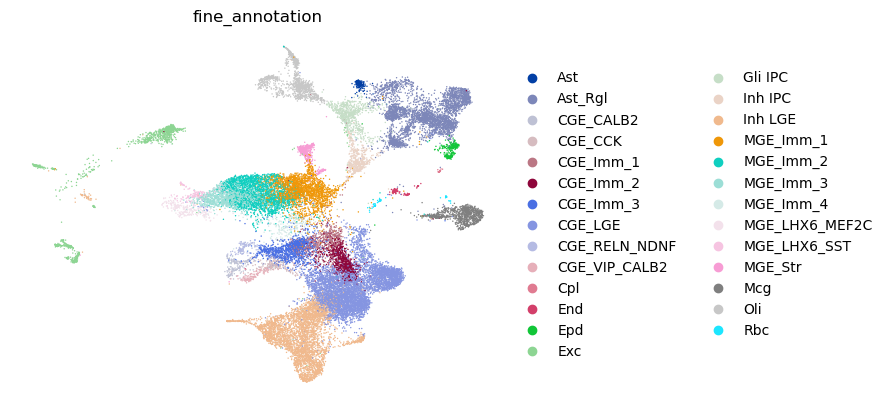

In [1]:
import scanpy as sc
import anndata
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
import numpy as np
import os
import pandas as pd

os.chdir("/wynton/group/paredes/Aunoy/python")

# load sparse matrix:
X = io.mmread("visref_counts.mtx")

# create anndata object
adata = anndata.AnnData(
    X=X.transpose().tocsr()
)

# load cell metadata:
cell_meta = pd.read_csv("visref_metadata.csv")

# load gene names:
with open("visref_gene_names.csv", 'r') as f:
    gene_names = f.read().splitlines()

# set anndata observations and index obs by barcodes, var by gene names
adata.obs = cell_meta
adata.obs.index = adata.obs['barcode']
adata.var.index = gene_names

# load dimensional reduction:
pca = pd.read_csv("visref_pca.csv")
scvi = pd.read_csv("visref_scvi.csv")
pca.index = adata.obs.index
scvi.index = adata.obs.index

# set pca and umap
adata.obsm['X_pca'] = pca.to_numpy()
adata.obsm['X_scvi'] = scvi.to_numpy()
adata.obsm['X_umap'] = np.vstack((adata.obs['UMAP_1'].to_numpy(), adata.obs['UMAP_2'].to_numpy())).T

# plot a UMAP colored by sampleID to test:
sc.pl.umap(adata, color=['fine_annotation'], frameon=False, save=True)

In [2]:
# save dataset as anndata format
#del adata.obs['outlier_call']
#adata.write('/wynton/group/paredes/Aunoy/visref_data.h5ad')

# reload dataset
#adata = sc.read_h5ad('/wynton/group/paredes/Aunoy/monocle_data.h5ad')

    adata.uns['iroot'] = root_cell_index
    adata.var['xroot'] = adata[root_cell_name, :].X


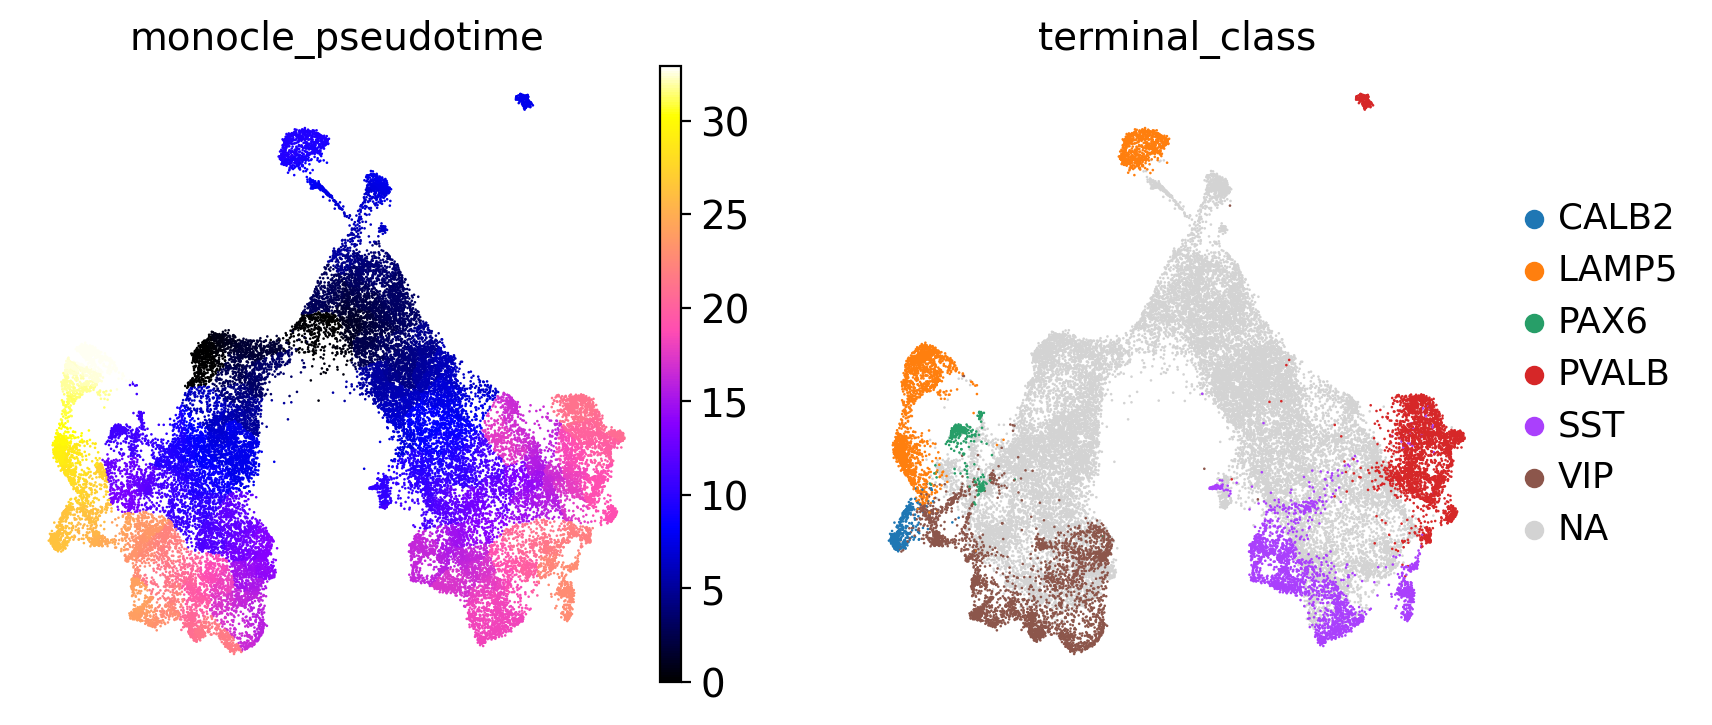

In [2]:
import numpy as np

import cellrank as cr
import scanpy as sc
import scvelo as scv
#import palantir
import scanpy as sc
import anndata
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
import os
import pandas as pd


scv.settings.verbosity = 3
scv.settings.set_figure_params("scvelo")
sc.settings.set_figure_params(frameon=False, dpi=100)
cr.settings.verbosity = 2

import warnings

warnings.simplefilter("ignore", category=UserWarning)

adata = sc.read_h5ad('/wynton/group/paredes/Aunoy/f5_final_data.h5ad')

sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30, use_rep = "X_scvi")
sc.tl.diffmap(adata)

#adata.uns["iroot"] = root_ixs
adata.obs['clusters'] = adata.obs['class']
sc.tl.dpt(adata)
sc.pl.embedding(
    adata,
    basis="umap",
    color=["monocle_pseudotime", "terminal_class"],
    color_map="gnuplot2",
)

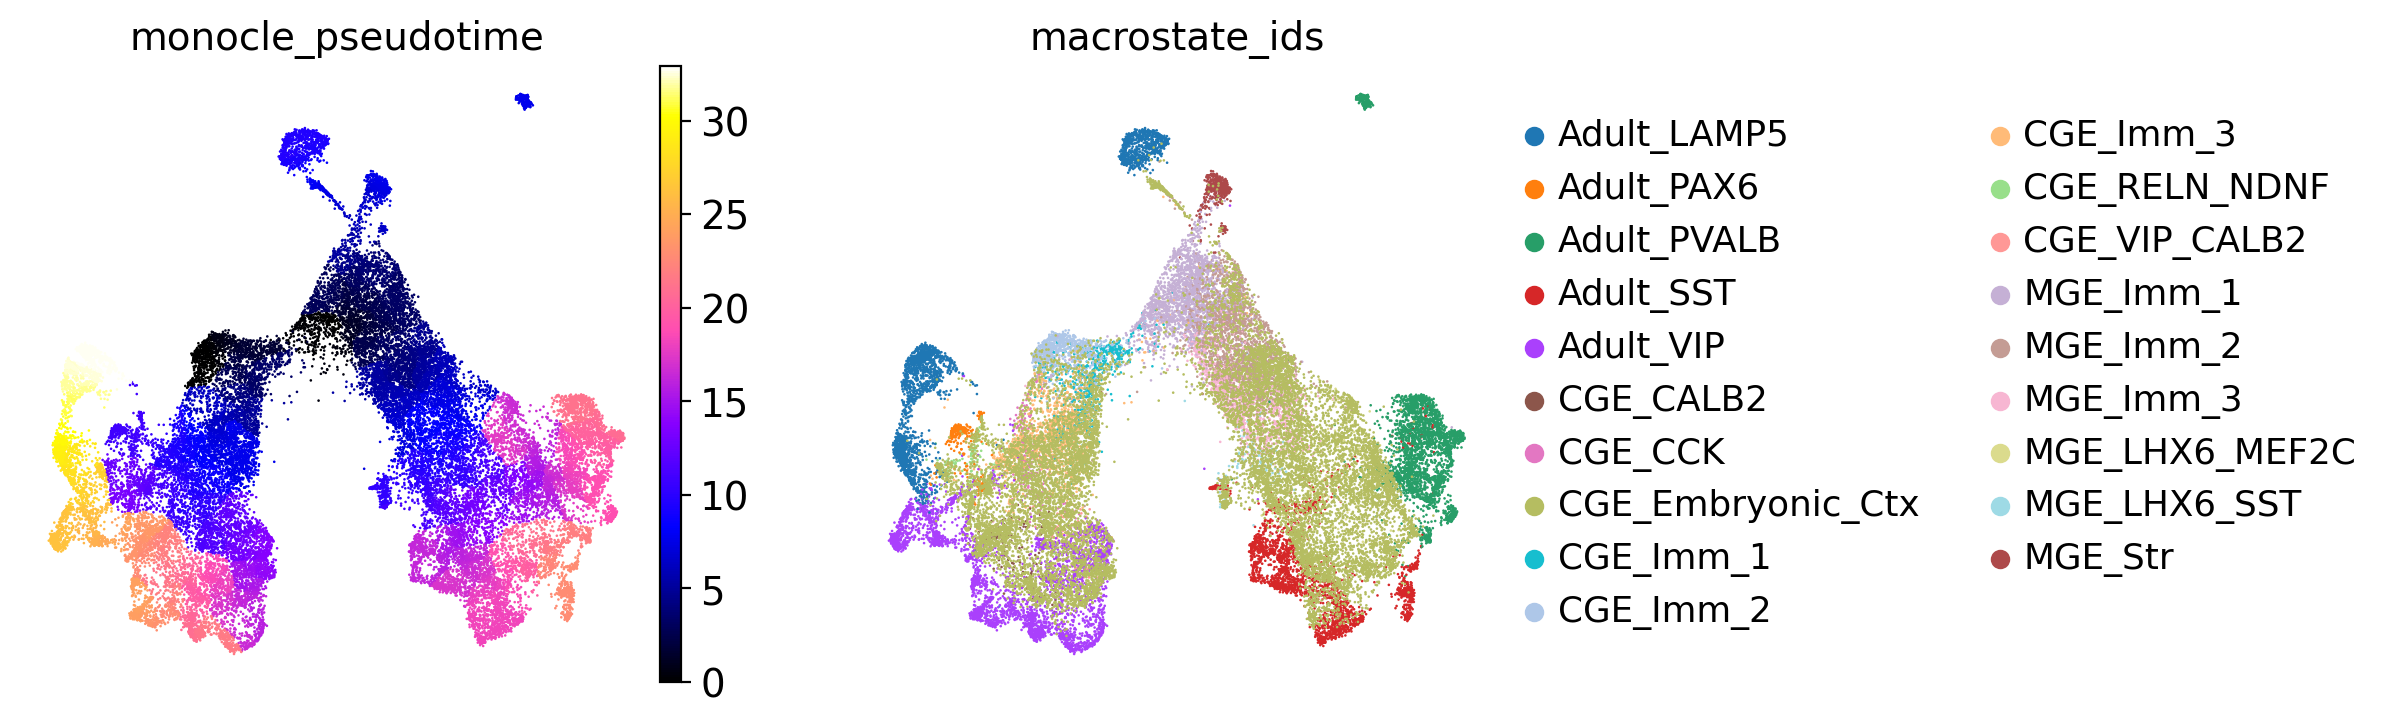

In [2]:
sc.pl.embedding(
    adata,
    basis="umap",
    color=["monocle_pseudotime", "macrostate_ids"],
    color_map="gnuplot2",
)

In [82]:
#from math import isnan
clabel = adata.obs['cluster_label']
clabel = clabel.astype(str)
clabel
clabel[1] = "lebron"
clabel
adata.obs['cluster_final'] = adata.obs['cluster_label'].astype(str)
adata.obs['cluster_final'][pd.isnull(adata.obs['cluster_label'])] = adata.obs['macrostate_ids'][pd.isnull(adata.obs['cluster_label'])].astype(str)
adata.obs['cluster_final'] 

barcode
2018-023_Arc_CAGATACCAACCGTGC-1_1            MGE_Imm_1
2018-023_Arc_TCTAACTCACTTCAGA-1_1            MGE_Imm_1
2018-023_Arc_CCTCATGTCGACATCA-1_1            MGE_Imm_1
2018-023_Arc_TTCAATCGTTGGGACA-1_1            MGE_Imm_1
2018-023_Arc_GGTAATCTCATAGCAC-1_1            MGE_Imm_1
                                           ...        
TTTGGAGCACGATAGG-1_15_4              CGE_Embryonic_Ctx
TTTGGAGTCGACTCCT-1_15_4              CGE_Embryonic_Ctx
TTTGGTTAGATGGGCT-1_15_4              CGE_Embryonic_Ctx
TTTGGTTTCCACAAGT-1_15_4              CGE_Embryonic_Ctx
TTTGTTGGTAACCAGG-1_15_4              CGE_Embryonic_Ctx
Name: cluster_final, Length: 34257, dtype: object

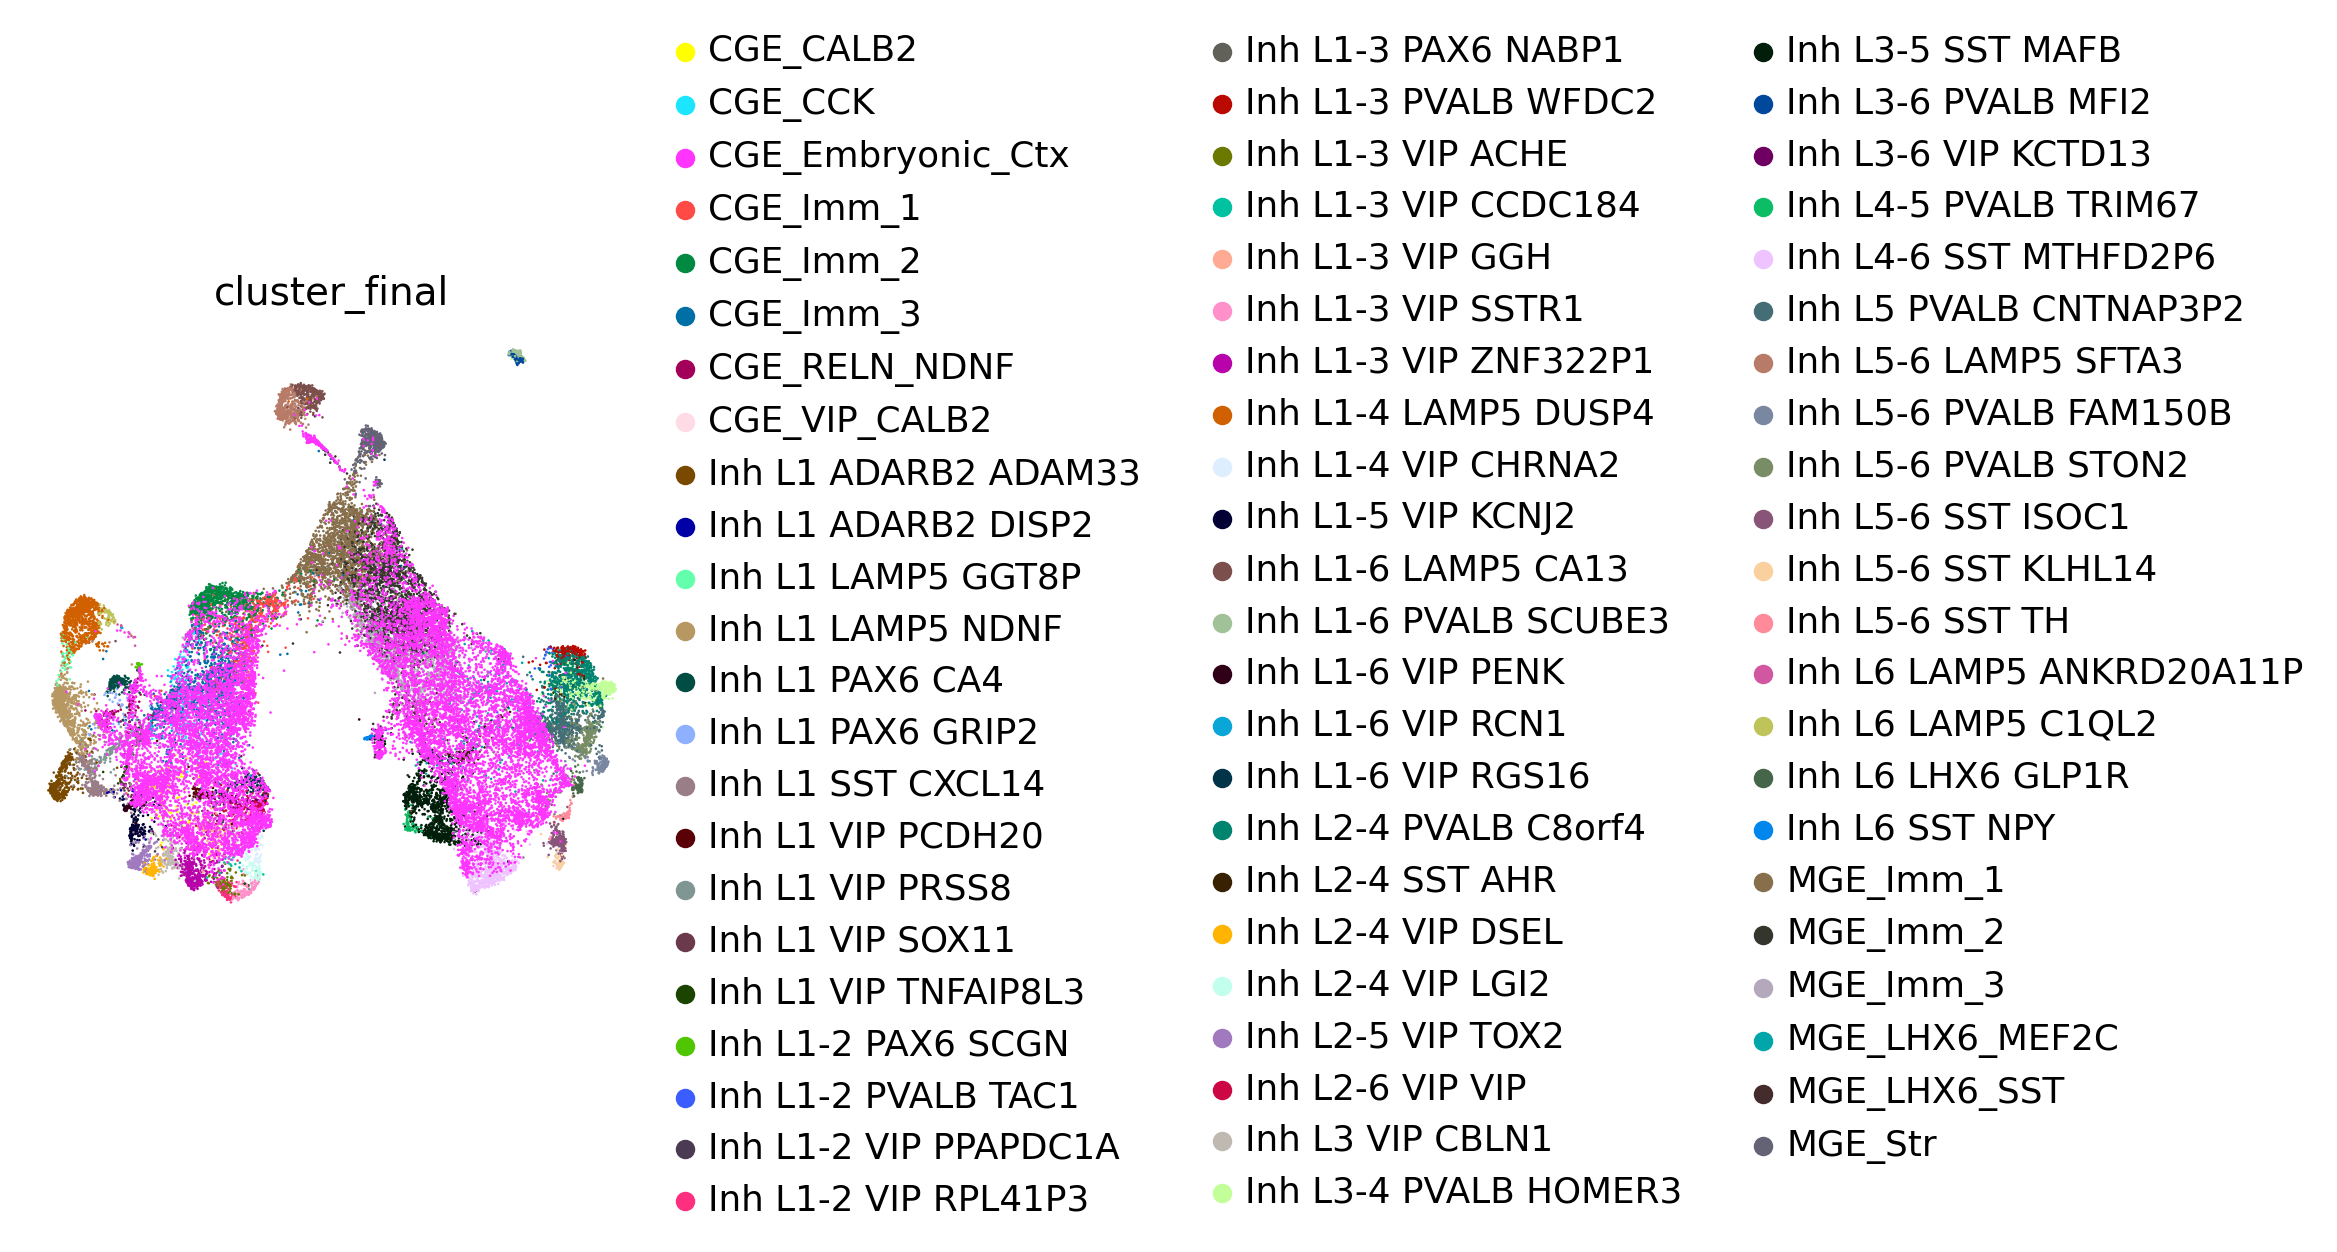

In [83]:
sc.pl.embedding(
    adata,
    basis="umap",
    color=["cluster_final"],
    color_map="gnuplot2",
)

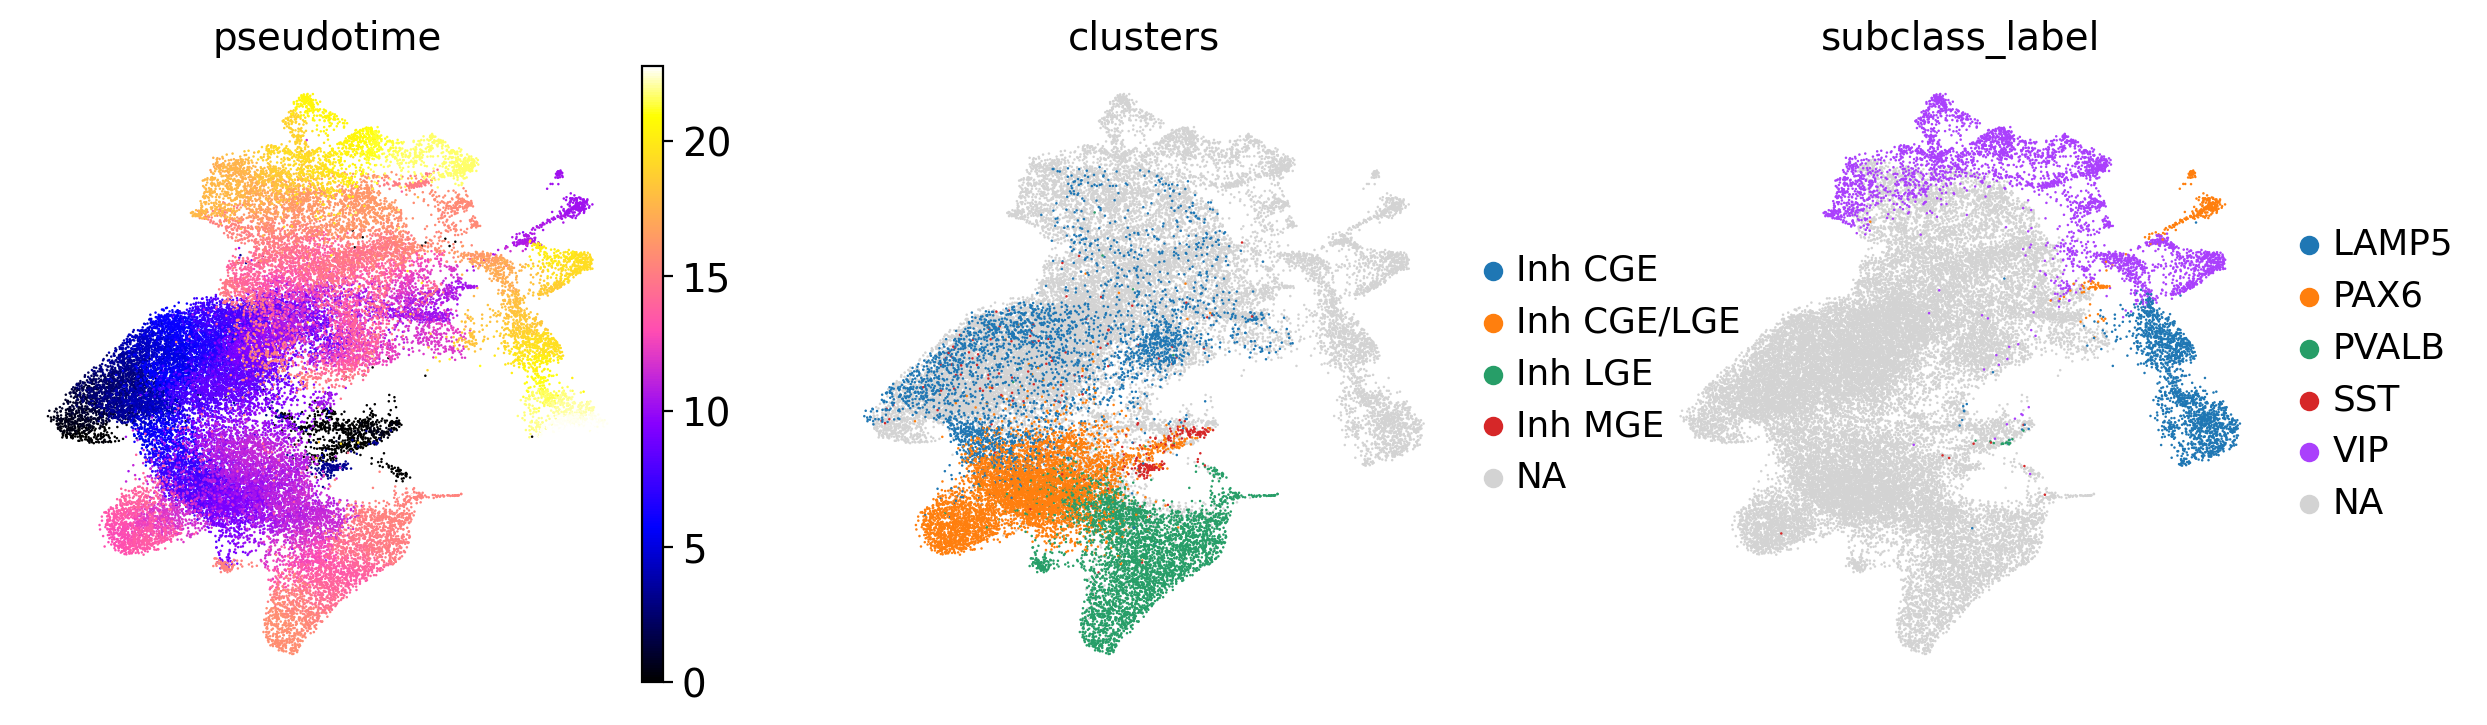

In [9]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30, use_rep = "X_scvi")
sc.tl.diffmap(adata)
sc.tl.umap(adata)

sc.pl.embedding(
    adata,
    basis="umap",
    color=["pseudotime", "clusters", "subclass_label"],
    color_map="gnuplot2",
)

In [3]:
pk = cr.kernels.PseudotimeKernel(adata, time_key="monocle_pseudotime")
pk.compute_transition_matrix()

print(pk)

Computing transition matrix based on pseudotime


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 34257/34257 [00:09<00:00, 3465.11cell/s]


    Finish (0:00:15)
PseudotimeKernel[n=34257]


In [4]:
from scipy.sparse import coo_matrix, csr_matrix

Projecting transition matrix onto `umap`
Adding `adata.obsm['T_fwd_umap']`
    Finish (0:00:14)


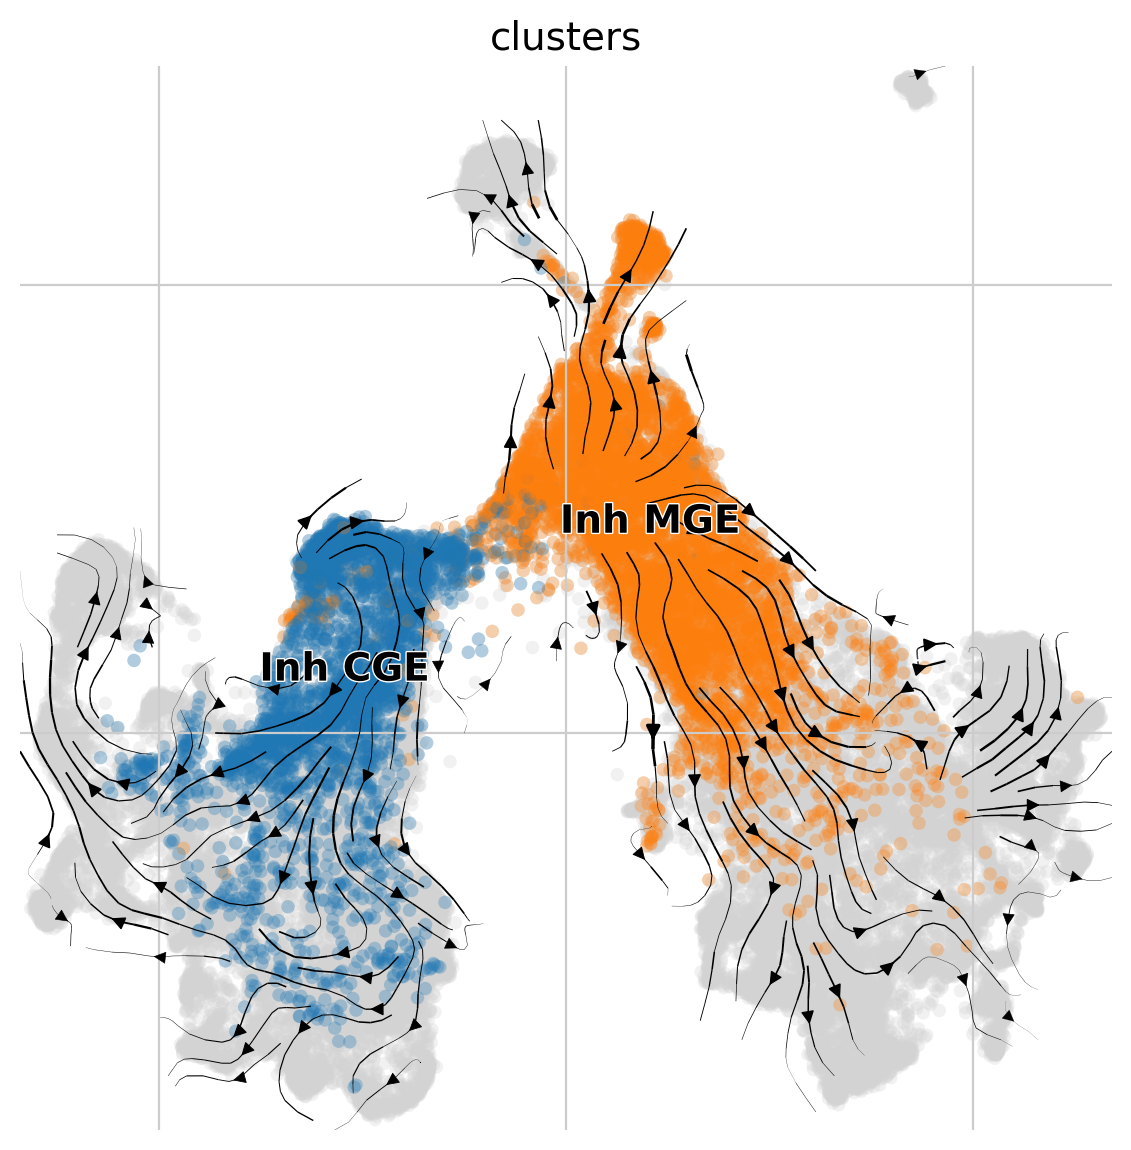

In [5]:
pk.plot_projection(basis="umap", recompute=True, figsize=(7, 7))


In [8]:
g2 = cr.estimators.GPCCA(pk)
print(g2)

GPCCA[kernel=PseudotimeKernel[n=34257], initial_states=None, terminal_states=None]


In [6]:
g2.compute_schur(n_components = 20)
g2.plot_spectrum(real_only=True )

NameError: name 'g2' is not defined

Computing `30` macrostates
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:30:17)


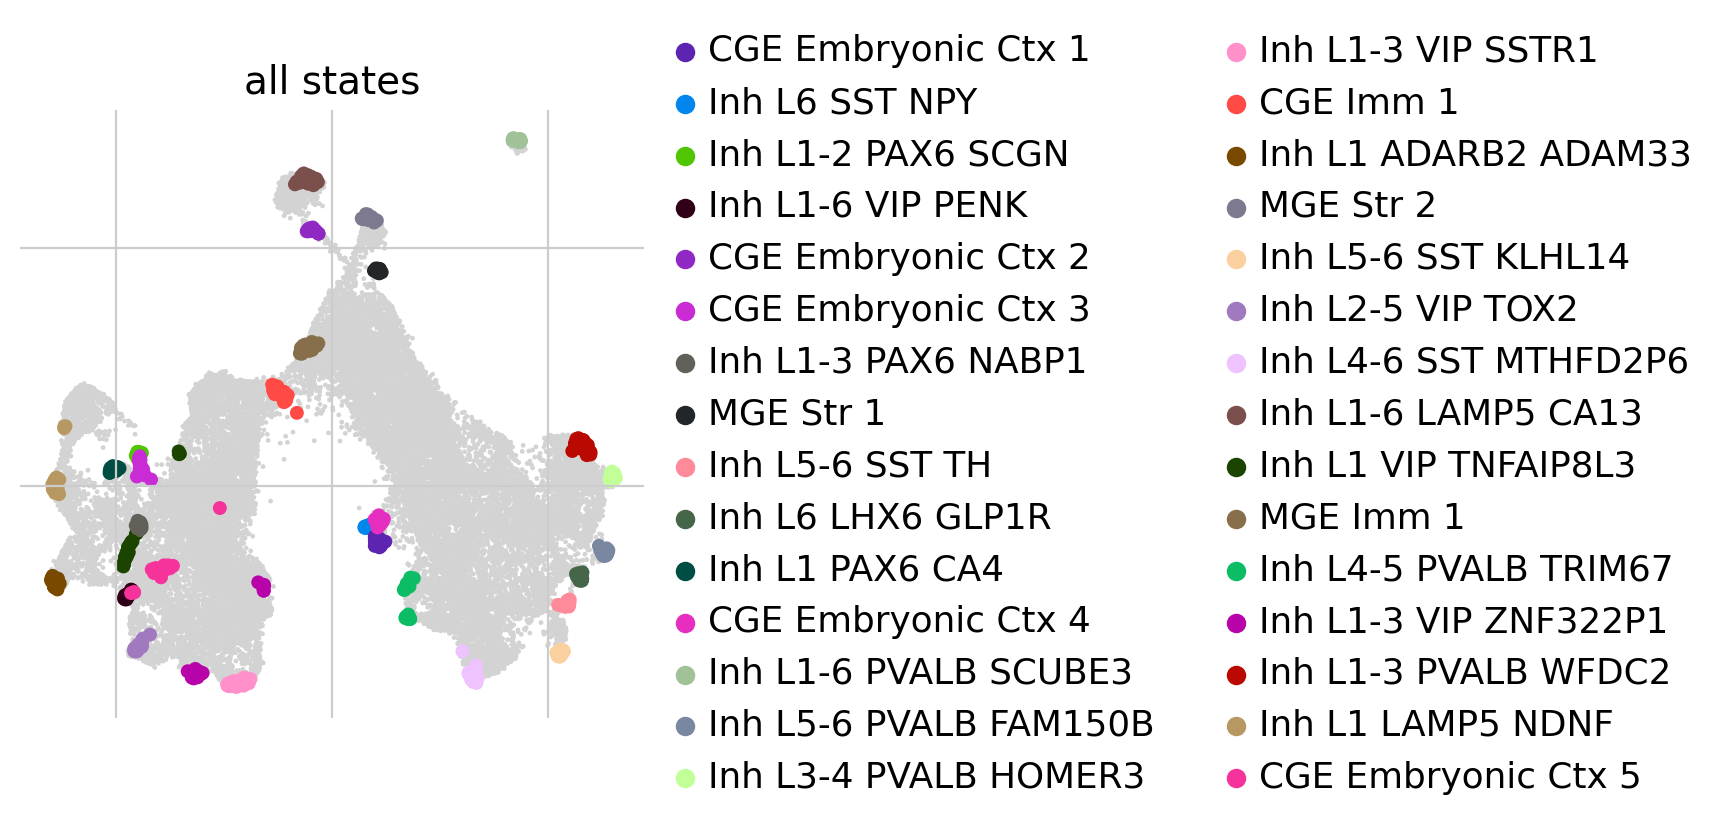

In [84]:
#g2.compute_macrostates(n_states=20, cluster_key="macrostate_ids")
g2.compute_macrostates(n_states=30, cluster_key="cluster_final")
g2.plot_macrostates(which="all", legend_loc="right", s=100)

In [4]:
in_states = [x for x in g2.macrostates.unique() if str(x) == "3_2"]

NameError: name 'g2' is not defined

In [85]:
in_states = ["CGE_Imm_1", "MGE_Imm_1"]

In [9]:
# In this block, I am going to to merge the terminal probabilities into something that makes sense

### Here I am trying to see if I can compute the probabilities of progenitors going to CGE and LGE subpallial

sst = [x for x in g2.macrostates.unique() if "Adult" in str(x) and "SST" in str(x)]
pvalb = [x for x in g2.macrostates.unique() if "Adult" in str(x) and "PVALB" in str(x)]
lamp5 = [x for x in g2.macrostates.unique() if "Adult" in str(x) and "LAMP5" in str(x)]
mge_str = [x for x in g2.macrostates.unique() if "Str" in str(x)]
vip = [x for x in g2.macrostates.unique() if "Adult" in str(x) and "VIP" in str(x)]
pax6 = [x for x in g2.macrostates.unique() if "Adult" in str(x) and "PAX6" in str(x)]

In [10]:
terminal_states_merged = [', '.join(sorted(sst)),  ', '.join(sorted(pvalb)), 
                          ', '.join(sorted(lamp5)), ', '.join(sorted(vip)), 
                          ', '.join(sorted(pax6)), #, ', '.join(sorted(lge_ob)),
                          ', '.join(sorted(mge_str))]
terminal_states_merged

['Adult_SST_1, Adult_SST_2, Adult_SST_3, Adult_SST_4, Adult_SST_5',
 'Adult_PVALB_1, Adult_PVALB_2, Adult_PVALB_3, Adult_PVALB_4, Adult_PVALB_5',
 'Adult_LAMP5_1, Adult_LAMP5_2',
 'Adult_VIP_1, Adult_VIP_2, Adult_VIP_3, Adult_VIP_4, Adult_VIP_5, Adult_VIP_6',
 'Adult_PAX6_1, Adult_PAX6_2, Adult_PAX6_3',
 'MGE_Str_1, MGE_Str_2']

In [86]:
initial_state_names = ["CGE_Imm", "MGE_Imm"]
#terminal_state_names = ["SST", "PV", "LAMP5", "VIP/CALB2", "PAX6", 
#                        "MGE_Str"]

Adding `adata.obs['init_states_fwd']`
       `adata.obs['init_states_fwd_probs']`
       `.initial_states`
       `.initial_states_probabilities`
       `.initial_states_memberships
    Finish`


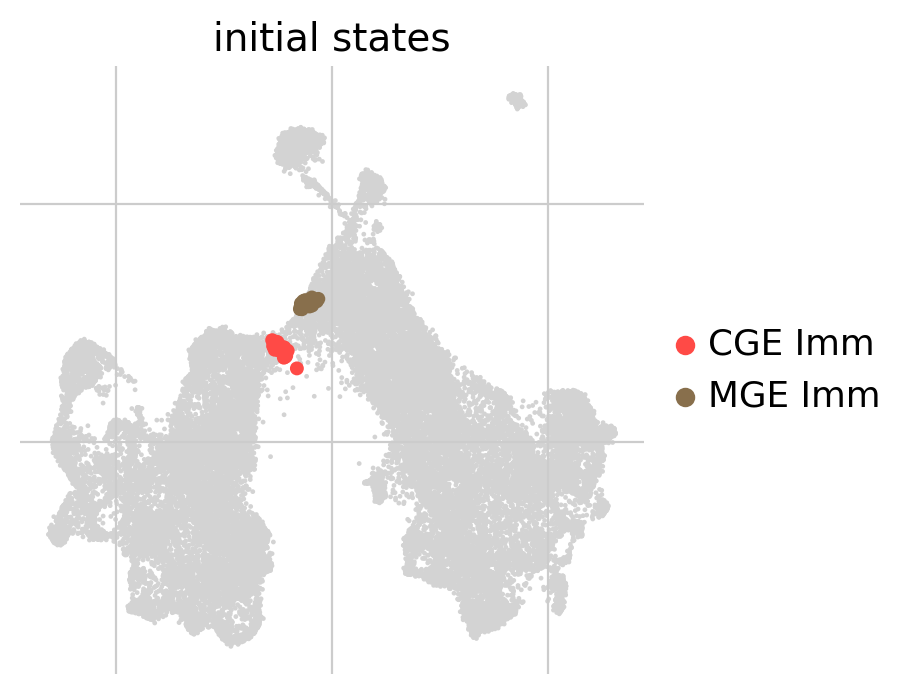

In [87]:
g2.set_initial_states(states=in_states, n_cells = 30, allow_overlap = True)
g2.rename_initial_states(dict(zip(in_states,initial_state_names)))
g2.plot_macrostates(which="initial", legend_loc="right", s=100)

In [97]:
terminal_States = [x for x in g2.macrostates.unique() if str(x) not in in_states and not pd.isnull(x)
                  and "Embryonic" not in str(x)]
#print(np.isnan(g2.macrostates.unique()))
terminal_States
#terminal_states = terminal_States[not np.nan(terminal_States)]

['MGE_Str_1',
 'MGE_Str_2',
 'Inh L1 VIP TNFAIP8L3',
 'Inh L5-6 SST TH',
 'Inh L4-6 SST MTHFD2P6',
 'Inh L1-2 PAX6 SCGN',
 'Inh L1-3 VIP SSTR1',
 'Inh L5-6 SST KLHL14',
 'Inh L6 SST NPY',
 'Inh L5-6 PVALB FAM150B',
 'Inh L1-3 VIP ZNF322P1',
 'Inh L6 LHX6 GLP1R',
 'Inh L1-3 PVALB WFDC2',
 'Inh L1-6 VIP PENK',
 'Inh L1 LAMP5 NDNF',
 'Inh L1-6 PVALB SCUBE3',
 'Inh L1-3 PAX6 NABP1',
 'Inh L1 ADARB2 ADAM33',
 'Inh L1-6 LAMP5 CA13',
 'Inh L2-5 VIP TOX2',
 'Inh L1 PAX6 CA4',
 'Inh L4-5 PVALB TRIM67',
 'Inh L3-4 PVALB HOMER3']

In [98]:
g2.macrostates.unique()

[NaN, 'MGE_Str_1', 'MGE_Imm_1', 'CGE_Imm_1', 'CGE_Embryonic_Ctx_1', ..., 'Inh L1 PAX6 CA4', 'CGE_Embryonic_Ctx_3', 'Inh L4-5 PVALB TRIM67', 'Inh L3-4 PVALB HOMER3', 'CGE_Embryonic_Ctx_2']
Length: 31
Categories (30, object): ['CGE_Embryonic_Ctx_1', 'Inh L6 SST NPY', 'Inh L1-2 PAX6 SCGN', 'Inh L1-6 VIP PENK', ..., 'Inh L1-3 VIP ZNF322P1', 'Inh L1-3 PVALB WFDC2', 'Inh L1 LAMP5 NDNF', 'CGE_Embryonic_Ctx_5']

In [99]:
g2.set_terminal_states(states=terminal_States, n_cells = 100, allow_overlap = True)

Adding `adata.obs['term_states_fwd']`
       `adata.obs['term_states_fwd_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`


GPCCA[kernel=PseudotimeKernel[n=34257], initial_states=['CGE_Imm', 'MGE_Imm'], terminal_states=['Inh L1 ADARB2 ADAM33', 'Inh L1 LAMP5 NDNF', 'Inh L1 PAX6 CA4', 'Inh L1 VIP TNFAIP8L3', 'Inh L1-2 PAX6 SCGN', 'Inh L1-3 PAX6 NABP1', 'Inh L1-3 PVALB WFDC2', 'Inh L1-3 VIP SSTR1', 'Inh L1-3 VIP ZNF322P1', 'Inh L1-6 LAMP5 CA13', 'Inh L1-6 PVALB SCUBE3', 'Inh L1-6 VIP PENK', 'Inh L2-5 VIP TOX2', 'Inh L3-4 PVALB HOMER3', 'Inh L4-5 PVALB TRIM67', 'Inh L4-6 SST MTHFD2P6', 'Inh L5-6 PVALB FAM150B', 'Inh L5-6 SST KLHL14', 'Inh L5-6 SST TH', 'Inh L6 LHX6 GLP1R', 'Inh L6 SST NPY', 'MGE_Str_1', 'MGE_Str_2']]

Adding `adata.obs['term_states_fwd']`
       `adata.obs['term_states_fwd_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`


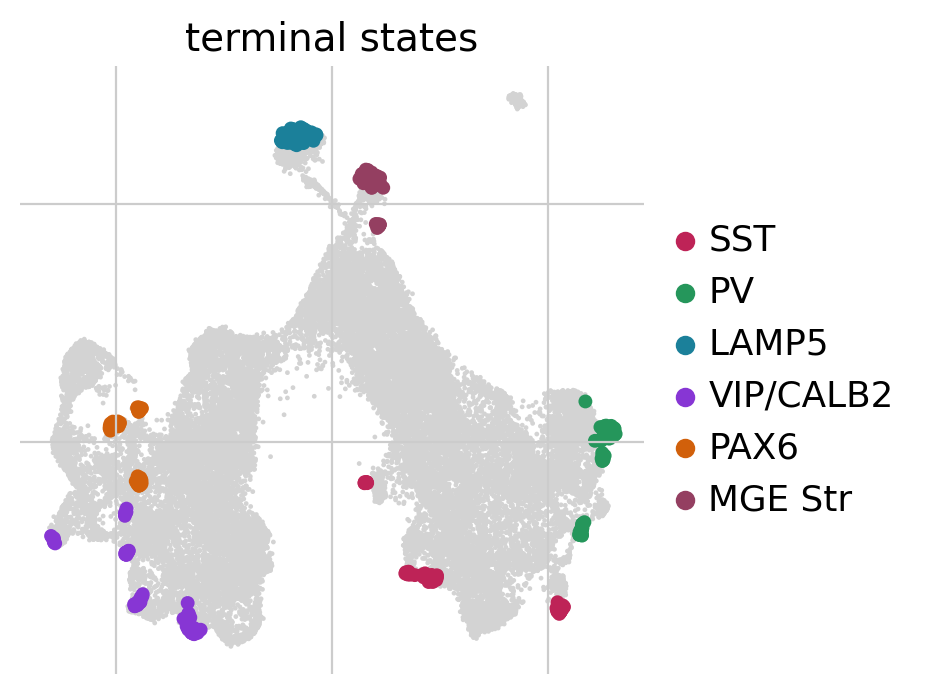

In [13]:
g2.set_terminal_states(states=terminal_states_merged, n_cells = 100, allow_overlap = True)
g2.rename_terminal_states(dict(zip(terminal_states_merged,terminal_state_names)))
g2.plot_macrostates(which="terminal", legend_loc="right", s=100)

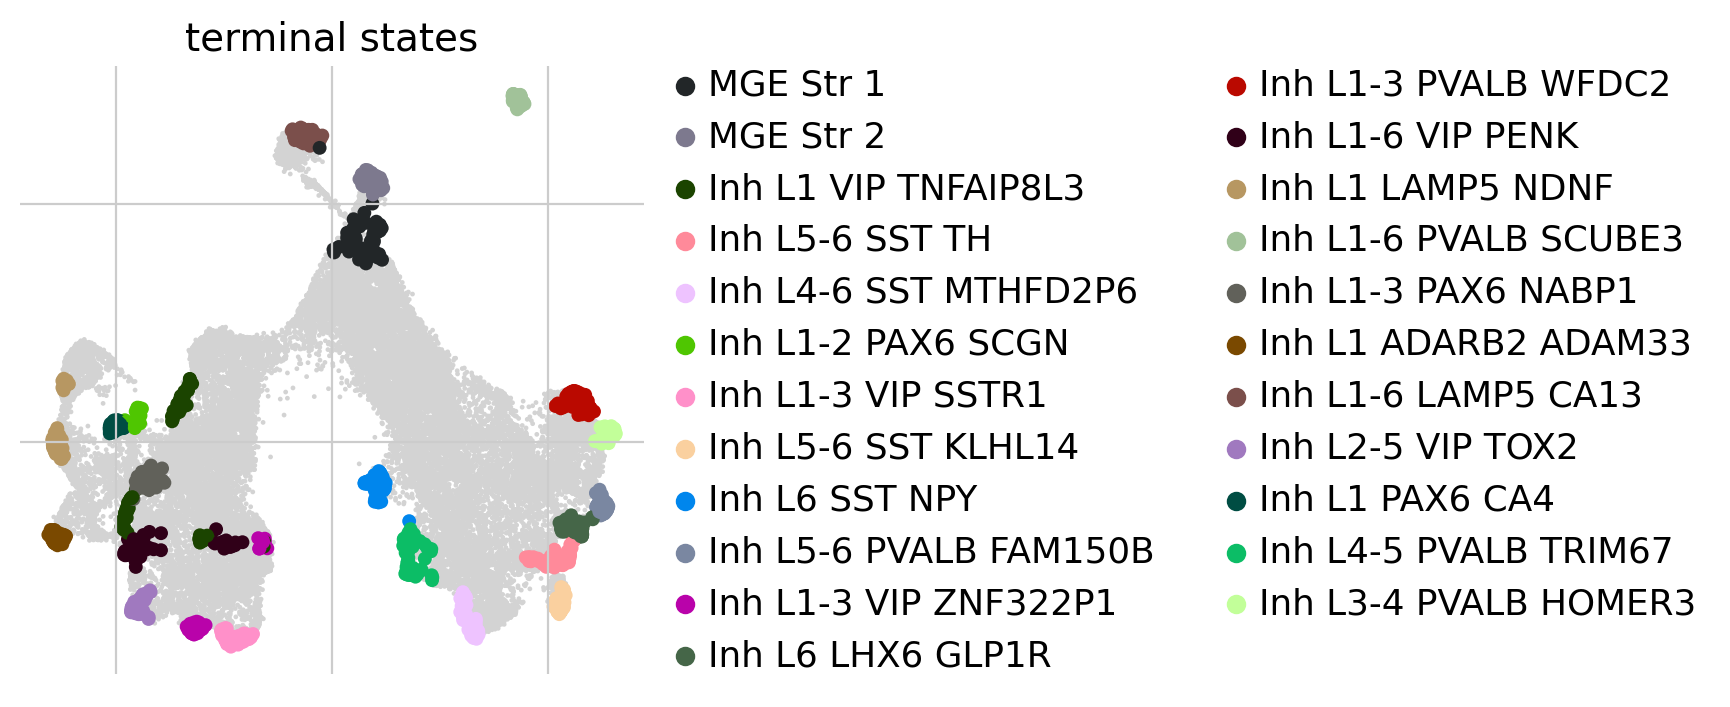

In [100]:
#g2.predict_terminal_states(allow_overlap = True)
g2.plot_macrostates(which="terminal", legend_loc="right", s=100)

Adding `adata.obs['init_states_fwd']`
       `adata.obs['init_states_fwd_probs']`
       `.initial_states`
       `.initial_states_probabilities`
       `.initial_states_memberships
    Finish`


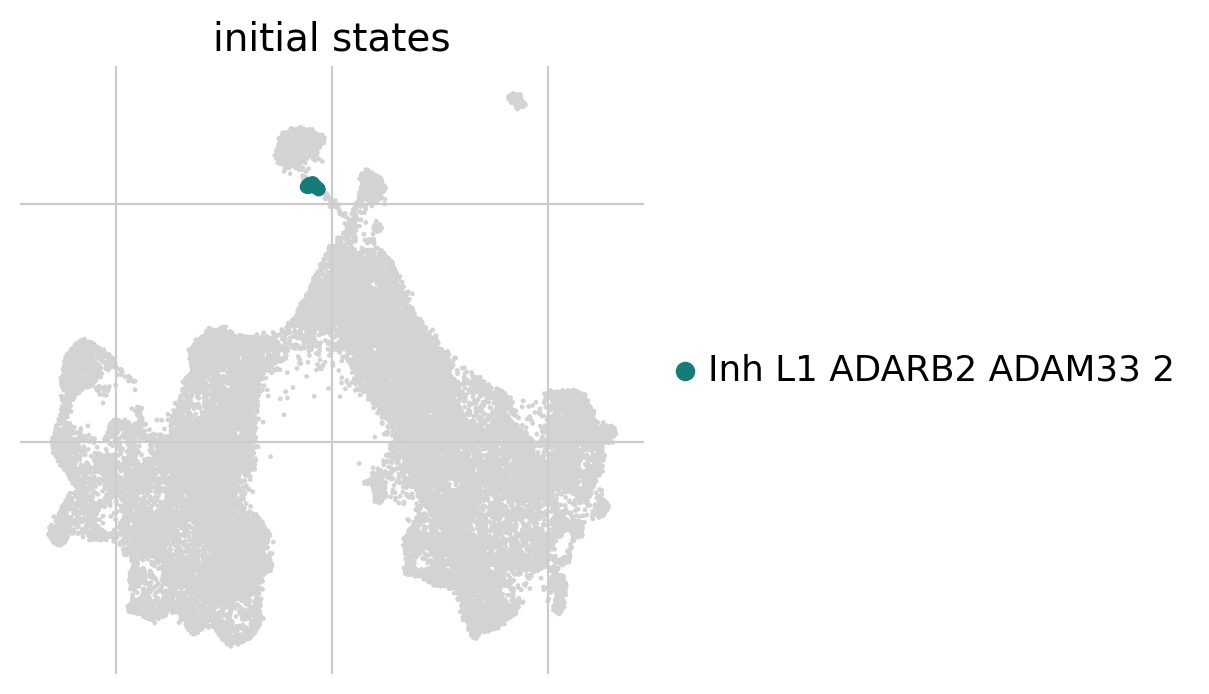

In [17]:
g2.predict_initial_states(allow_overlap=True)
g2.plot_macrostates(which="initial", legend_loc="right", s=100)

In [101]:
g2.compute_fate_probabilities()
#g2.plot_fate_probabilities(same_plot=False)

Computing fate probabilities


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:02<00:00, 11.32/s]


Adding `adata.obsm['lineages_fwd']`
       `.fate_probabilities`
    Finish (0:00:02)


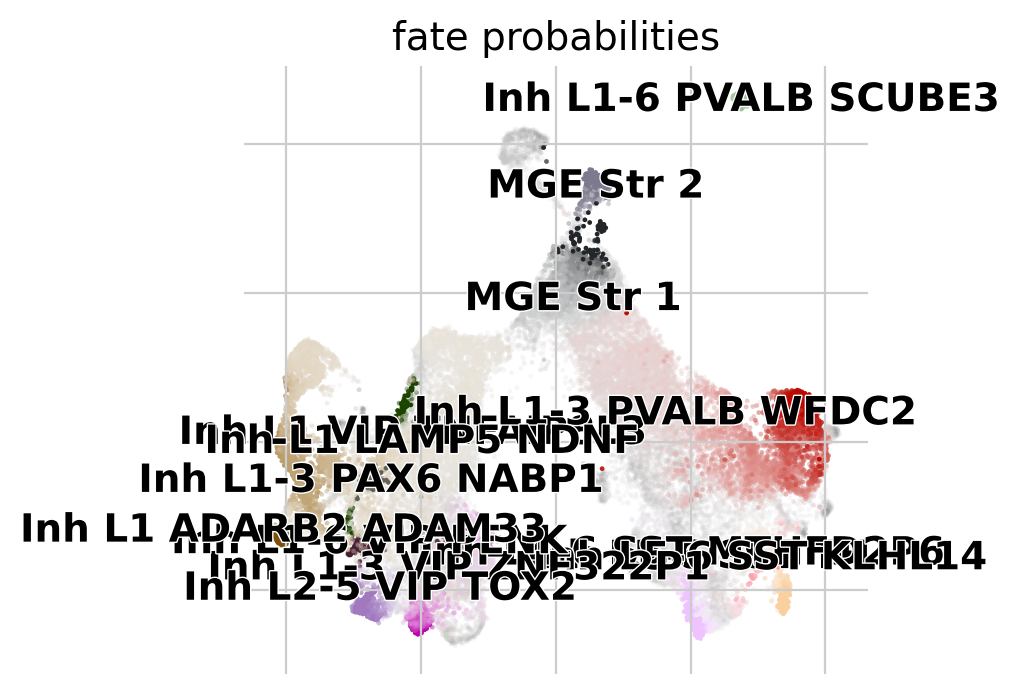

In [112]:
g2.plot_fate_probabilities(same_plot =True, states = lineages)

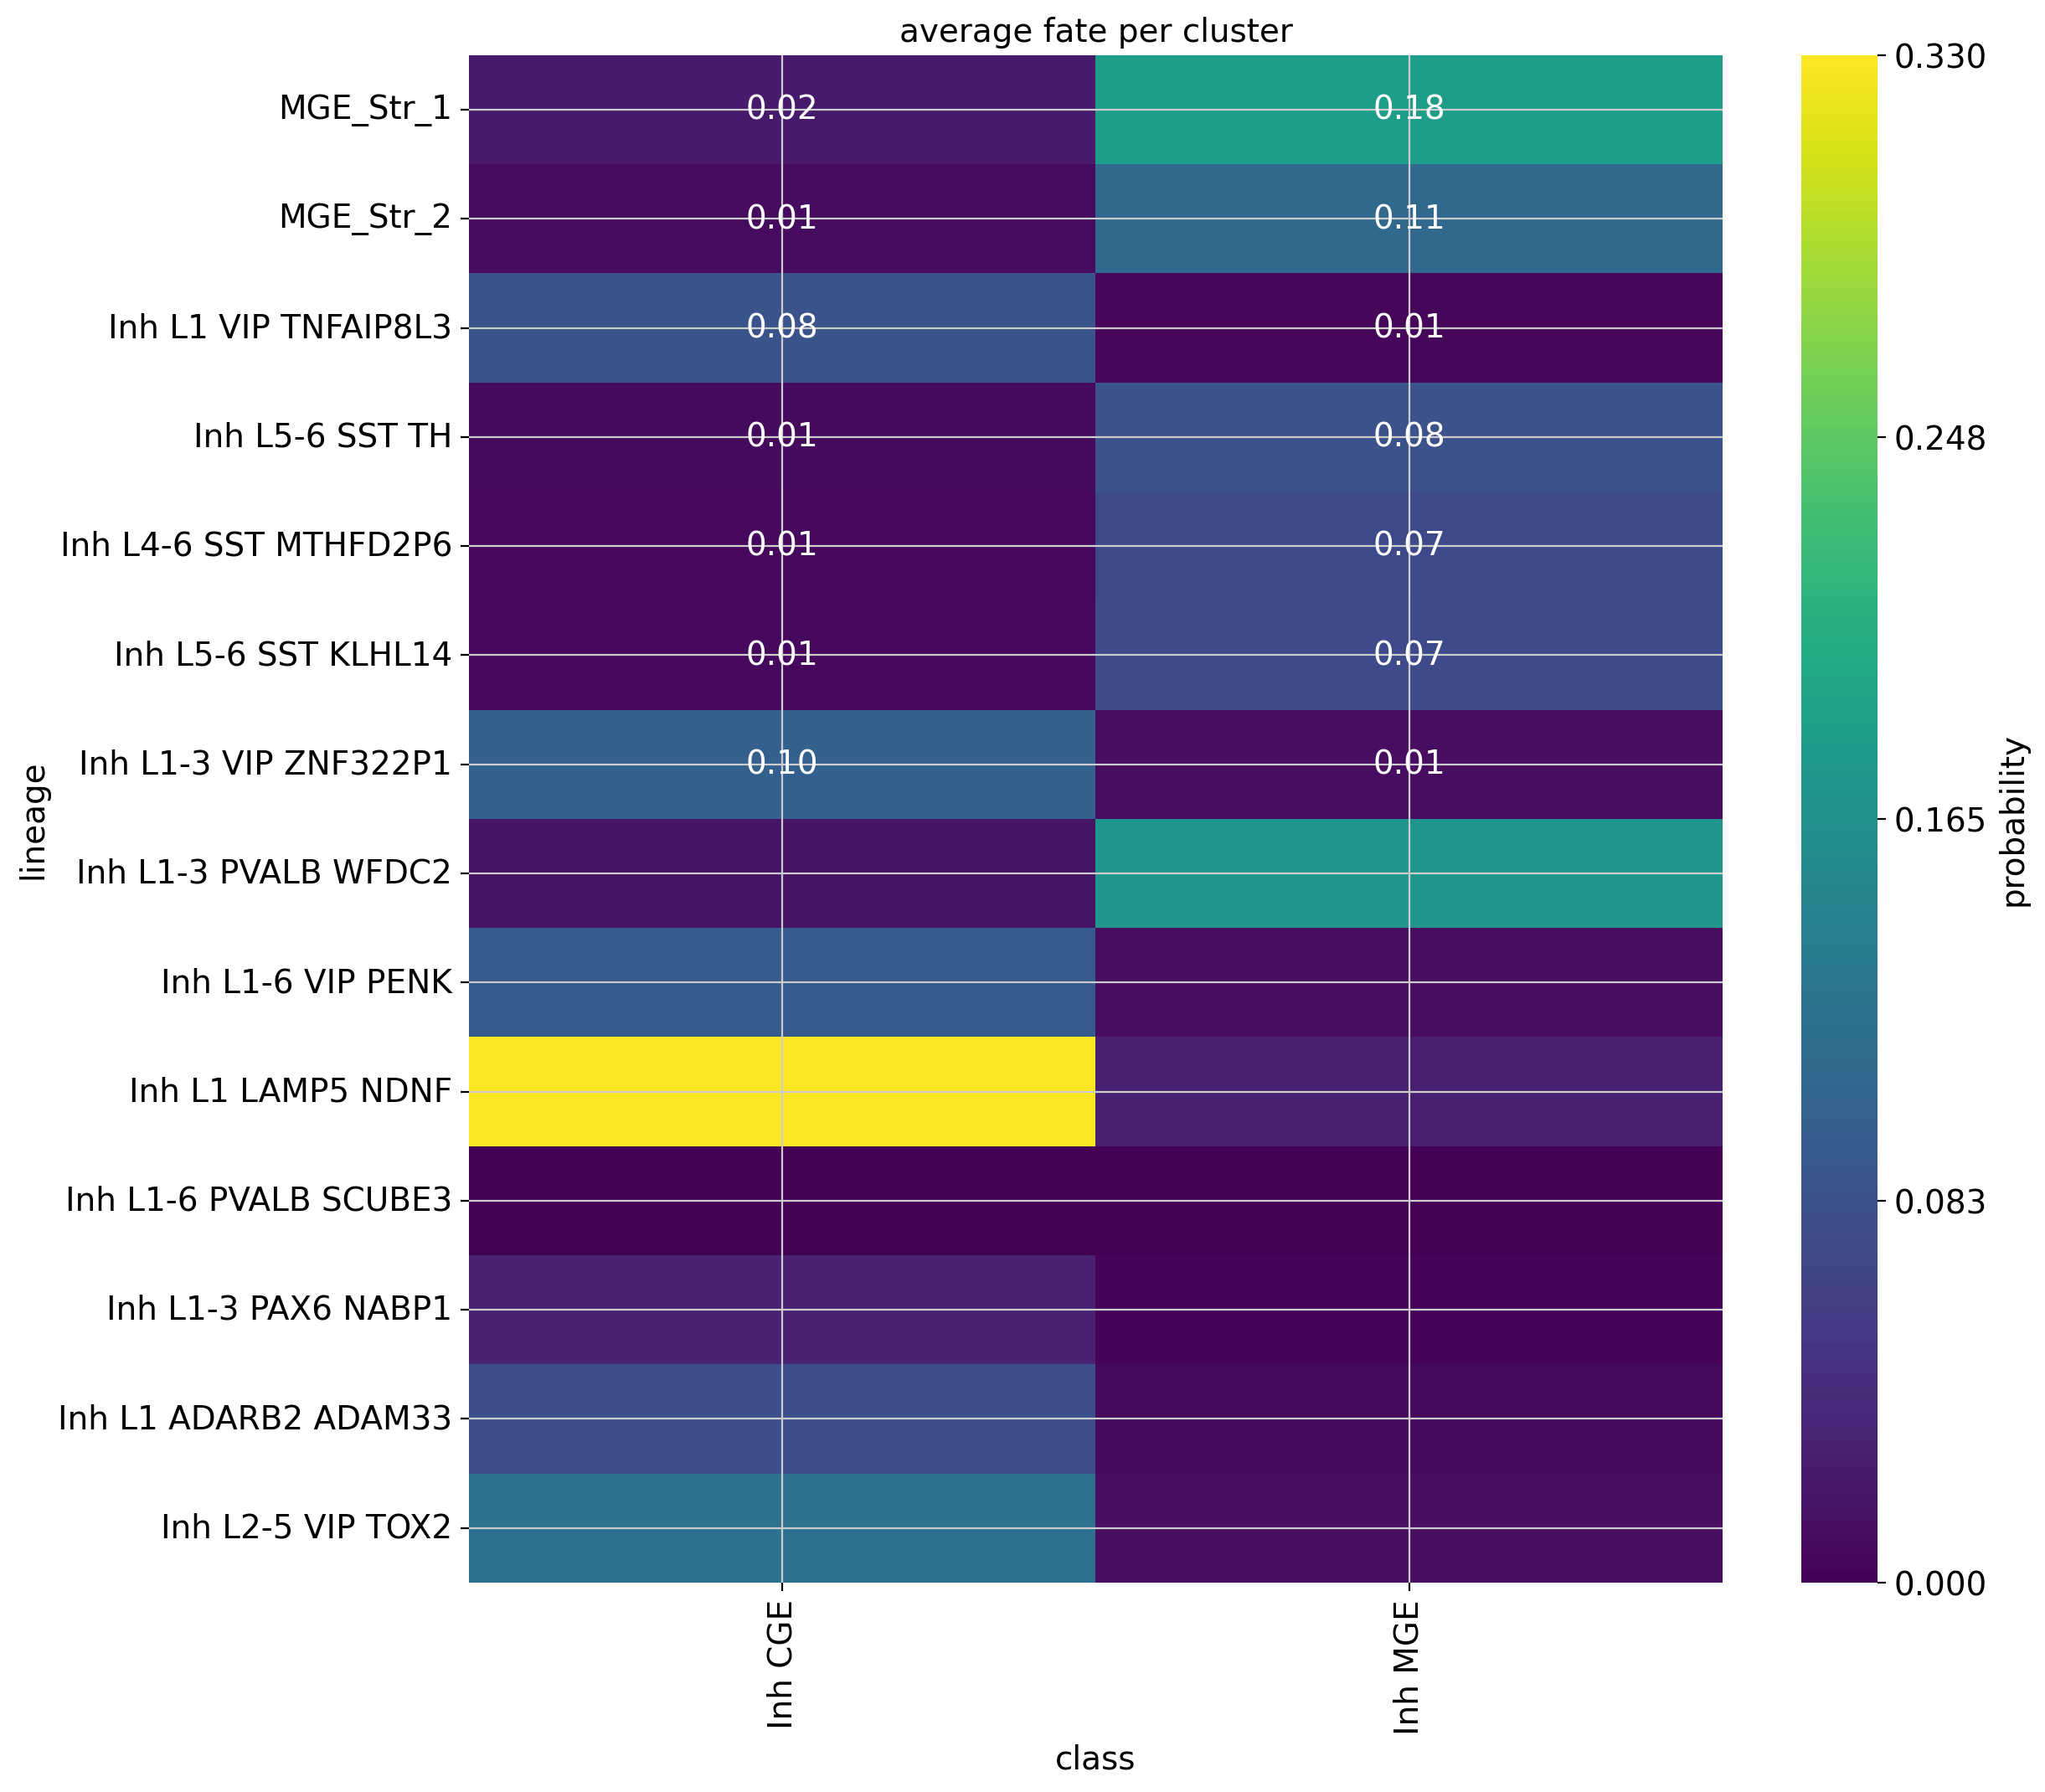

In [105]:
lineages = ['MGE_Str_1',
 'MGE_Str_2',
 'Inh L1 VIP TNFAIP8L3',
 'Inh L5-6 SST TH',
 'Inh L4-6 SST MTHFD2P6',
 'Inh L5-6 SST KLHL14',
 'Inh L1-3 VIP ZNF322P1',
 'Inh L1-3 PVALB WFDC2',
 'Inh L1-6 VIP PENK',
 'Inh L1 LAMP5 NDNF',
 'Inh L1-6 PVALB SCUBE3',
 'Inh L1-3 PAX6 NABP1',
 'Inh L1 ADARB2 ADAM33',
 'Inh L2-5 VIP TOX2',
]

cr.pl.aggregate_fate_probabilities(
    adata,
    mode="heatmap",
    lineages= lineages, 
    cluster_key="class",
    clusters= ["Inh CGE", "Inh MGE"],
    sharey = True,
    figsize = (12,12)
)

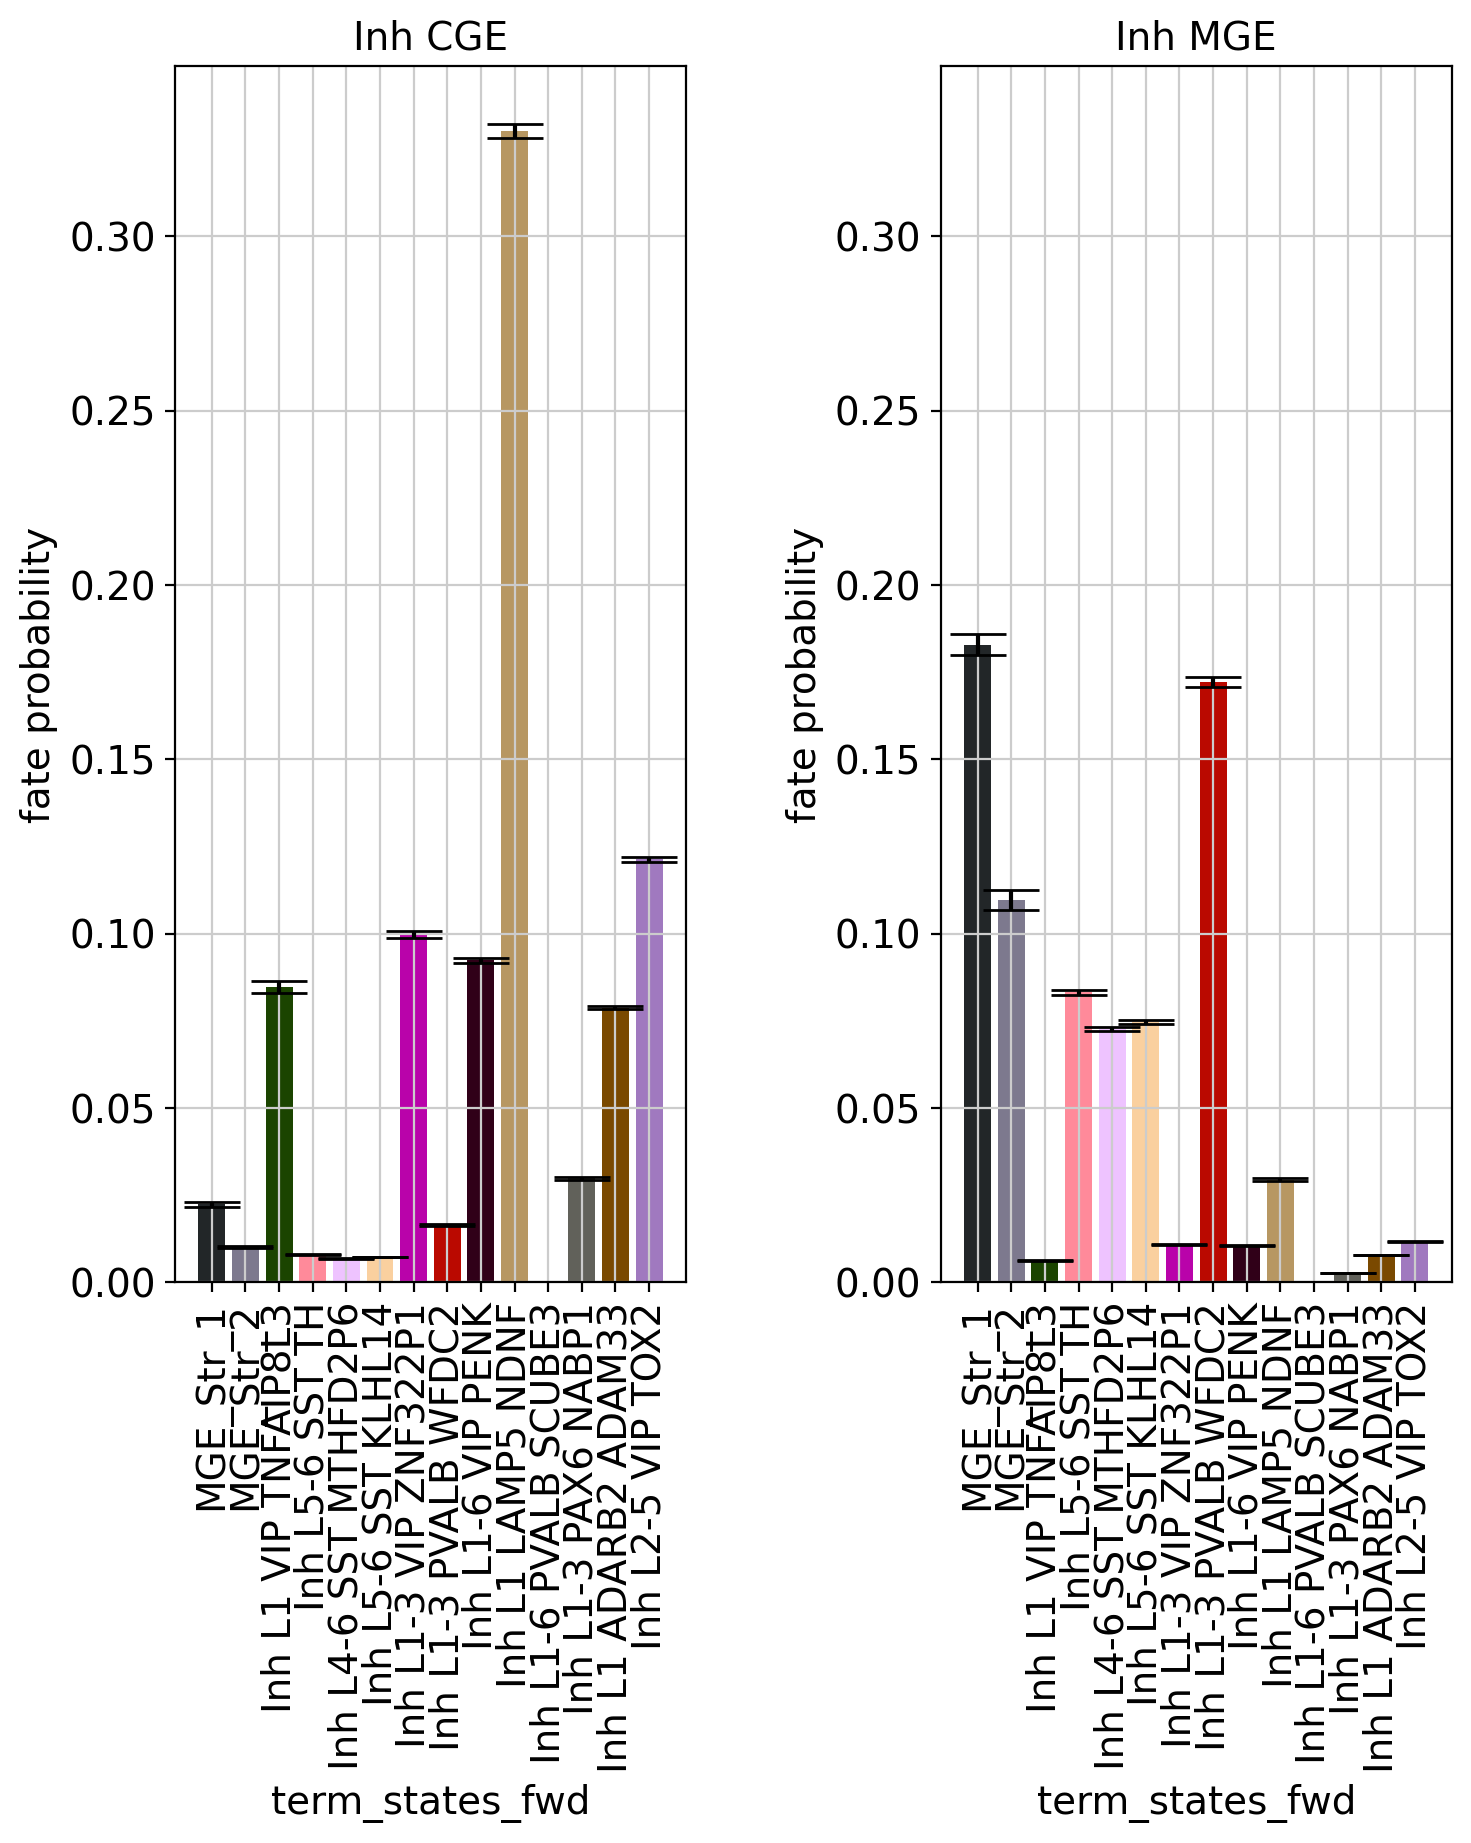

In [110]:
cr.pl.aggregate_fate_probabilities(
    adata,
    mode="bar",
    lineages= lineages, 
    cluster_key="class",
    clusters= ["Inh CGE", "Inh MGE"],
    sharey = True,
    figsize = (18,8)
)

In [32]:
my_df = pd.DataFrame(g2.fate_probabilities, columns = g2.fate_probabilities.names, index = adata.obs.index)

In [33]:
my_df.to_csv("/wynton/group/paredes/Aunoy/f5_final_probs.csv")